<a href="https://colab.research.google.com/github/jmmarinr/ComputationalMethods/blob/master/Raices/Trascendentales_Librerias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt

# Ecuaciones trascendentales

Las ecuaciones trascendentales son aquellas que no pueden expresarse únicamente con operaciones algebraicas, es decir, contienen funciones trascendentales como logaritmos, exponenciales, senos, cosenos, etc. Resolver este tipo de ecuaciones generalmente requiere métodos numéricos, ya que no siempre es posible encontrar soluciones exactas de forma algebraica.

Supongamos que queremos resolver:

$$xe^x = 1$$

Graficamente tendriamos que la raiz seria equivalente al punto de corte entre $e^x$ y $1/x$. Esta ecuación vemos que no tiene solución algebraica, por ende, se hace necesario utilizar métodos númericos.

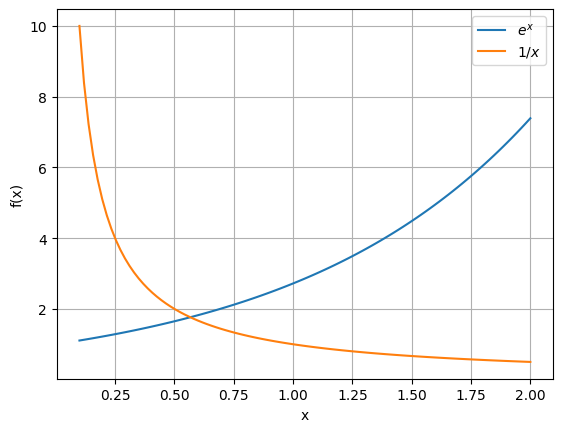

In [ ]:
f = lambda x: np.exp(x)
g = lambda x: 1/x


x = np.linspace(.1, 2, 100)
plt.plot(x, f(x), label='$e^x$')
plt.plot(x, g(x), label='$1/x$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()

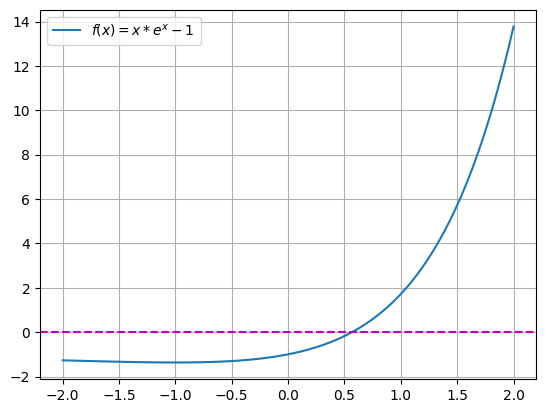

In [ ]:
f = lambda x: x*np.exp(x) - 1
x = np.linspace(-2, 2, 100)
plt.plot(x, f(x), label = '$f(x)=x*e^x-1$')
plt.axhline(y=0, color='m', linestyle = '--')
plt.legend()
plt.grid(True)
plt.show()

## Ejemplo: Ecuación de Kepler

En mecánica celeste, la **Ecuación de Kepler** describe el movimiento de un cuerpo en una órbita elíptica:

$$
M = E - e \sin E
$$

donde:
- $M$ es la **anomalía media** (proporcional al tiempo),
- $E$ es la **anomalía excéntrica** (ángulo auxiliar),
- $e$ es la **excentricidad orbital**, con $0 < e < 1$.

La ecuación es **trascendental** en $E$ y debe resolverse numéricamente para obtener la posición del cuerpo.


Dado $M = 1$ rad y $e = 0.6$, resolver:

$$
E - 0.6 \sin E = 1
$$



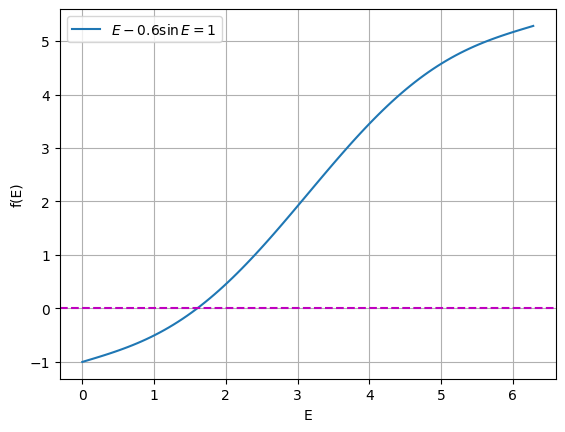

Anomalía excéntrica E: 1.599748548227517


In [ ]:
import numpy as np
from scipy.optimize import newton

# Parámetros
M = 1.0
e = 0.6

# Definición de la función f(E) = E - e*sin(E) - M
def kepler_eq(E):
    return E - e * np.sin(E) - M

E = np.linspace(0, 2*np.pi, 100)
plt.plot(E, kepler_eq(E), label = '$E - 0.6 \\sin E = 1$')
plt.axhline(y=0, color='m', linestyle = '--')
plt.xlabel('E')
plt.ylabel('f(E)')
plt.legend()
plt.grid(True)
plt.show()

# Resolución usando el método de Brent
sol = newton(kepler_eq, x0 = 1.0)
print("Anomalía excéntrica E:", sol)

# Métodos Numéricos para Encontrar Raíces de Funciones en Python

Una raíz de una función $f(x)$ es un valor $x = r$ tal que $f(r) = 0$. En general, muchas funciones no admiten una solución analítica exacta para sus raíces, por lo que se utilizan **métodos numéricos**.

En Python, las siguientes librerías permiten resolver raíces de manera eficiente:

- `scipy.optimize`
- `numpy`

Usando los siguientes métodos:

- Métodos clásicos: Bisección, Newton-Raphson, Secante
- Métodos disponibles en `scipy.optimize.root_scalar`
- Método `fsolve` para sistemas no lineales
- Método `np.roots` para polinomios


In [ ]:
from scipy.optimize import bisect, newton, root_scalar, fsolve

In [ ]:
def f(x):
  '''
  función a la que queremos encontrar la raíz
  x^3 - 2*x^2 - 5 = 0
  '''
  return x**3 - 2*x**2 - 5

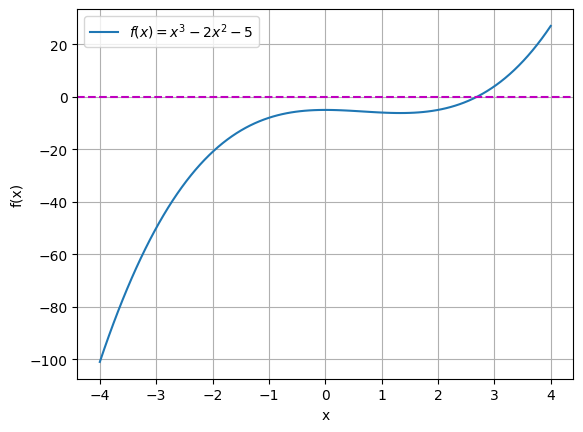

In [ ]:
x = np.linspace(-4, 4, 100)
plt.plot(x, f(x), label = '$f(x)=x^3-2x^2-5$')
plt.legend()
plt.axhline(y=0, color='m', linestyle = '--')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()

## Método de Bisección

Requiere un intervalo $[a, b]$ tal que $f(a)f(b) < 0$. Divide el intervalo iterativamente hasta alcanzar la raíz con la precisión deseada.

In [ ]:
raiz_biseccion = bisect(f, 2, 3)
print("Raíz (Bisección):", raiz_biseccion)


Raíz (Bisección): 2.6906474480292673


## Método de Newton-Raphson


El método de Newton-Raphson utiliza una estimación inicial $x_0$ y la derivada de la función $f'(x)$ para iterar mediante la fórmula:

$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}
$$

Este método converge rápidamente si la función es suficientemente suave y $x_0$ está cerca de la raíz.






In [ ]:
def f(x):
    return x**3 - 2*x**2 - 5

def df(x):
    return 3*x**2 - 4*x

# Usando derivada explícita
raiz_newton = newton(f, x0=2.5, fprime=df)
print("Raíz (Newton-Raphson):", raiz_newton)

# Usando derivada aproximada (diferencias finitas)
raiz_newton_aprox = newton(f, x0=2.5)
print("Raíz (Newton sin derivada explícita):", raiz_newton_aprox)


Raíz (Newton-Raphson): 2.6906474480286136
Raíz (Newton sin derivada explícita): 2.6906474480286136


## Método de la Secante

La secante es un método similar a Newton-Raphson pero no requiere conocer la derivada. Utiliza dos aproximaciones iniciales \$x\_0\$ y \$x\_1\$ para estimar la raíz:

$$
x_{n+1} = x_n - f(x_n) \cdot \frac{x_n - x_{n-1}}{f(x_n) - f(x_{n-1})}
$$

In [ ]:
# Método de la secante: se especifican dos valores iniciales
raiz_secante = newton(f, x0=2, x1=3)
print("Raíz (Secante):", raiz_secante)

Raíz (Secante): 2.6906474480286136


## Método fsolve (Raíces de funciones no lineales)

`fsolve` resuelve sistemas de ecuaciones no lineales $f(x) = 0$, usando un método iterativo similar a Newton-Raphson multidimensional.



In [ ]:
raiz_fsolve = fsolve(f, x0=2.5)
print("Raíz (fsolve):", raiz_fsolve[0])


Raíz (fsolve): 2.6906474480286136


In [ ]:
def sistema(vars):
    x, y = vars
    return [x**2 + y**2 - 4, x*y - 1]

solucion_sistema = fsolve(sistema, [1, 1])
print("Solución del sistema:", solucion_sistema)


Solución del sistema: [1.93185165 0.51763809]


## Método `numpy.roots`


El método `numpy.roots` permite encontrar todas las raíces (reales y complejas) de un polinomio cuyos coeficientes se conocen.

Para polinomios de la forma:

$$
P(x) = a_n x^n + a_{n-1} x^{n-1} + \cdots + a_1 x + a_0
$$

Se representa en Python como una lista o array de coeficientes ordenados desde el mayor grado al término independiente:






In [ ]:
# Polinomio: x³ - 2x² - 5
coeficientes = [1, -2, 0, -5]

raices = np.roots(coeficientes)
print("Raíces del polinomio:", raices)

Raíces del polinomio: [ 2.69064745+0.j         -0.34532372+1.31872678j -0.34532372-1.31872678j]


# Convergencia y Errores Comunes en Métodos de Búsqueda de Raíces

## 1. Método de Bisección

### Convergencia

- **Orden**: Lineal
- **Condiciones**: $f(a)\cdot f(b) < 0$ (cambio de signo)
- **Garantía de convergencia**: Siempre que $f$ sea continua en $[a, b]$ y cumpla la condición anterior.

### Fórmula del error:

$$
|r - x_n| \leq \frac{b - a}{2^n}
$$

### Errores comunes

- Elegir un intervalo $[a, b]$ sin cambio de signo.
- Aplicarlo a funciones discontinuas.
- Lentitud si se requiere alta precisión (convergencia lenta).

---

## 2. Método del Punto Fijo

### Convergencia

- **Orden**: Lineal (en general).
- Requiere reescribir $f(x) = 0$ como $x = g(x)$.
- Si $g$ es continua y derivable en un entorno de la raíz y $|g'(x)| < 1$, el método converge localmente.

### Criterio de convergencia:

$$
|x_{n+1} - r| \leq |g'(r)| \cdot |x_n - r|
$$

### Errores comunes

- Escoger una función $g(x)$ inadecuada que no cumpla $|g'(x)| < 1$ cerca de la raíz.
- Oscilaciones o divergencia.


---

## 3. Método de Newton-Raphson

### Convergencia

- **Orden**: Cuadrático si $f \in C^2$ y $f'(r) \ne 0$.
- Muy eficiente si se inicia cerca de la raíz.

### Fórmula de iteración:

$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}
$$

### Errores comunes

- Derivada $f'(x_n) \approx 0$ causa división por número pequeño o cero.
- Raíz múltiple: la convergencia se vuelve lineal.
- Malas estimaciones iniciales pueden llevar a divergencia.
- Costoso si se evalúa simbólicamente la derivada.

---

## 4. Método de la Secante

### Convergencia

- **Orden**: Superlineal, aproximadamente $\varphi = \frac{1+\sqrt{5}}{2} \approx 1.618$
- No requiere derivada.

### Fórmula de iteración:

$$
x_{n+1} = x_n - f(x_n) \cdot \frac{x_n - x_{n-1}}{f(x_n) - f(x_{n-1})}
$$

### Errores comunes

- Si $f(x_n) \approx f(x_{n-1})$, se produce división por número pequeño.
- Sensible a malas estimaciones iniciales.
- Convergencia más lenta que Newton, pero mejor que bisección.

---

## Comparación de Órdenes de Convergencia

| Método         | Orden de Convergencia | Derivada requerida |
|----------------|------------------------|---------------------|
| Bisección      | Lineal                 | No                  |
| Punto Fijo     | Lineal                 | Implícitamente sí   |
| Newton-Raphson | Cuadrático             | Sí                  |
| Secante        | Superlineal ($\approx 1.618$) | No         |

---



